## homework
wine.txt 降维

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [5]:
print("Reading in LAMOST data...")
data = pd.read_csv('./wine.csv')
X = data.iloc[:, 1:]
y = data.iloc[:, 0]
print(X.shape)

Reading in LAMOST data...
(177, 13)


In [6]:
#数据标准化处理
from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler().fit_transform(X)

In [32]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_norm)

var_ratio = pca.explained_variance_ratio_#计算比例
print(var_ratio)

[0.35983071 0.1924128  0.1117946  0.07111109 0.06628744 0.04960367]


In [33]:
#拆分数据
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.4, random_state= 42)
#通过RandomForestClassifier进行训练
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
# 调参
param_grid = {
    'n_estimators':[5,10,15,20],
    'max_features':[1,2,3,4],
    'criterion':['gini','entropy']
}

rf=RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

CV_rfc.best_params_

{'criterion': 'gini', 'max_features': 3, 'n_estimators': 10}

In [35]:
# 用最佳参数重新训练模型
rfc = RandomForestClassifier(criterion='gini',max_features=3,n_estimators=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=3, n_estimators=10)

              precision    recall  f1-score   support

           1       1.00      0.96      0.98        26
           2       0.96      0.93      0.95        28
           3       0.89      1.00      0.94        17

    accuracy                           0.96        71
   macro avg       0.95      0.96      0.96        71
weighted avg       0.96      0.96      0.96        71

[[25  1  0]
 [ 0 26  2]
 [ 0  0 17]]


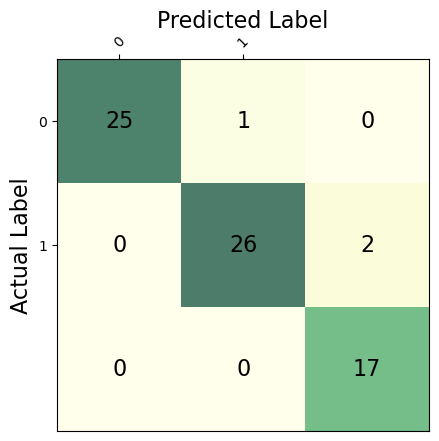

In [36]:
# 利用模型对测试集进行预测，输出target预测标签值和概率
y_test_pred = rfc.predict(X_test)
y_test_prob = rfc.predict_proba(X_test)

print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

def show_confusion_matrix(cnf_matrix, class_labels):
    plt.matshow(cnf_matrix, cmap=plt.cm.YlGn, alpha=0.7)
    ax = plt.gca()
    ax.set_xlabel('Predicted Label', fontsize=16)
    ax.set_xticks(range(0,len(class_labels)))
    ax.set_xticklabels(class_labels,rotation=45)
    ax.set_ylabel('Actual Label', fontsize=16, rotation=90)
    ax.set_yticks(range(0,len(class_labels)))
    ax.set_yticklabels(class_labels)
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()

    for row in range(len(cnf_matrix)):
        for col in range(len(cnf_matrix[row])):
            ax.text(col, row, cnf_matrix[row][col], va='center', ha='center', fontsize=16)

class_labels = [0,1]

cnf_matrix = confusion_matrix(y_test, y_test_pred) 
show_confusion_matrix(cnf_matrix, class_labels)
plt.show()

### 维度测试记录

- 5维 accuracy  0.97

  [[26  0  0]
  
  [ 1 25  2]

  [ 0  0 17]]

- 4维 accuracy  0.94
- 6维 accuracy  0.97

  [[26  0  0]
 
  [ 0 26  2]
 
  [ 0  0 17]]
 
最终为 6维